In [1]:
from itertools import accumulate
import matplotlib.pyplot as plt
from math import log,sqrt
from scipy.stats import norm
from statistics import mean,variance

In [2]:
class sumstats :
    def __init__(self,X) :
        self.X = X
        self.SX = [0] + list(accumulate(X))
        self.SXX = [0] + list(accumulate([x*x for x in X]))
        

In [3]:
class normal_mean :
    def __init__(self,X) :
        self.sumstats = sumstats(X)
    def __call__(self,i,j) :
        result = []
        for start in  range(j+1) :
            val = self.sumstats.SX[j+1] - self.sumstats.SX[start]
            val *= val
            val /= (j - start + 1)
            val = -val
            val += self.sumstats.SXX[j+1] - self.sumstats.SXX[start]
            result.append(val)
        return result

In [4]:
def op(S) :
    p_cost = [f+c+S.beta for f,c in zip(S.F,S.cost(0,len(S.F)-1))]
    min_p_cost = min(p_cost)
    S.F.append(min_p_cost)
    S.cpts.append(len(S.F) - p_cost.index(min_p_cost) - 1)
    return S

In [9]:
class state :
    def __init__(self,X,cost,beta) :
        self.n = len(X) 
        self.cost = cost(X)
        self.beta = beta
        self.F = [-beta]
        self.cpts = [0]

In [6]:
def changepoints(S) :
    locations = [len(S.cpts) - 1]
    while locations[0] - S.cpts[locations[0]] - 1 > 0 :
        locations.insert(0,locations[0] - S.cpts[locations[0]] - 1)
    return locations

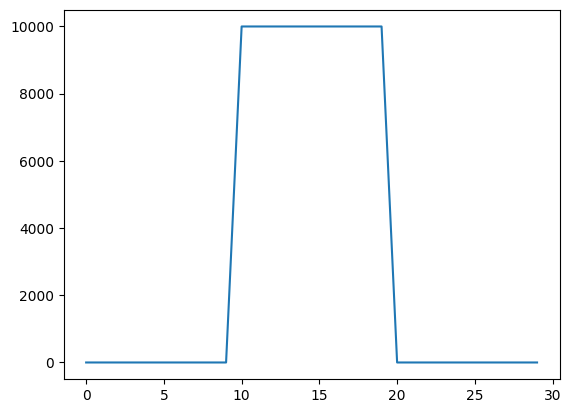

In [7]:
Z = [0 for i in range(10)] + [10000 for i in range(10)]  + [0 for i in range(10)]
plt.plot(Z)
plt.show()

In [10]:
S = state(Z,normal_mean,2*log(len(Z)))
for i in range(S.n-1) :
    S = op(S)
print(S.cpts)
    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [11]:
changepoints(S)

[9, 19, 29]

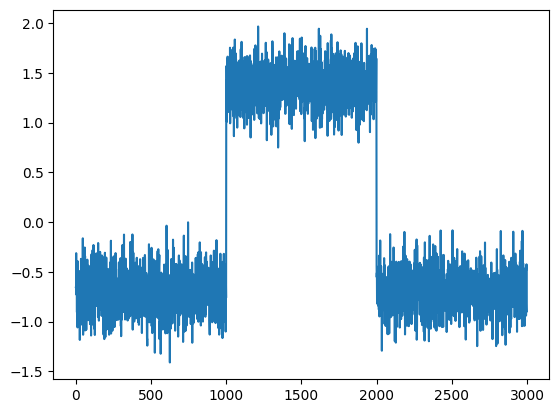

In [12]:
X = [0 for i in range(1000)] + [10 for i in range(1000)] + [0 for i in range(1000)]
E = norm.rvs(size=3000)
Z = [x+e for x,e in zip(X,E)]
mu = mean(Z)
sigma = sqrt(variance(Z))
Z = [(z-mu)/sigma for z in Z]
plt.plot(Z)
plt.show()

In [14]:
S = state(Z,normal_mean,2*log(len(Z)))
for i in range(S.n-1) :
    S = op(S)
changepoints(S)

[999, 1999, 2999]